In [23]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [24]:
#Loading dataset
data=pd.read_csv("/content/car price prediction.csv.zip")

In [25]:
data


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [41]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [27]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [28]:
# find missing value
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [29]:
# find duplicated values
data[data.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [30]:
#Data Cleaning
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [31]:
data['Fuel_Type'].unique()


array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [32]:
data['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [33]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [34]:
# Encoding Categorical Columns

data['Fuel_Type']=data['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})
data['Selling_type']=data['Selling_type'].map({'Dealer':0,'Individual':1})
data['Transmission']=data['Transmission'].map({'Manual':0,'Automatic':1})
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


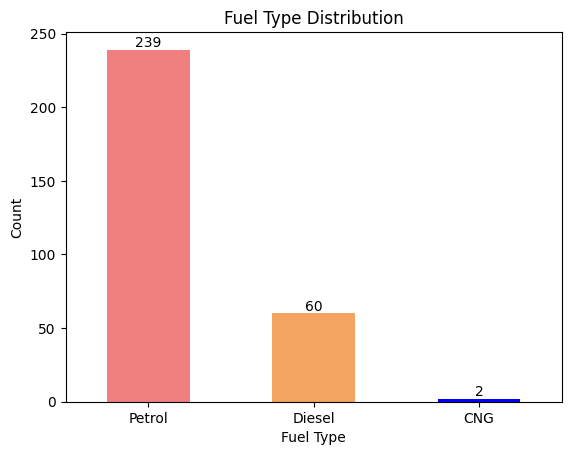

In [35]:
# Count occurrences of each fuel type
fuel_counts = data['Fuel_Type'].value_counts().sort_index()
# Replace the numeric codes with meaningful names
fuel_counts.index = ['Petrol', 'Diesel','CNG']
# Plotting
x=fuel_counts.plot(kind='bar', color=['lightcoral', 'sandybrown','blue'])
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
x.bar_label(x.containers[0])
plt.show()

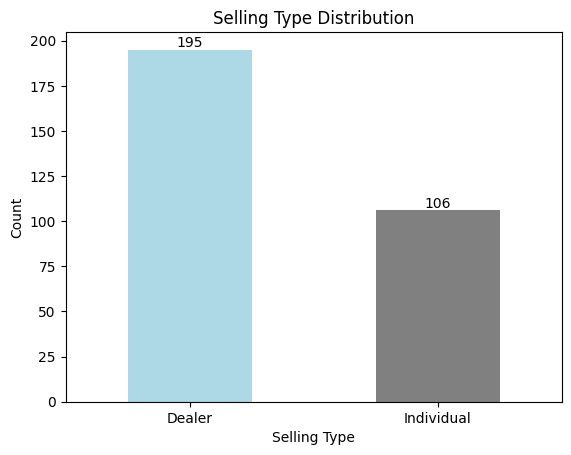

In [36]:
# Count occurrences of each fuel type
sell_counts = data['Selling_type'].value_counts().sort_index()
# Replace the numeric codes with meaningful names
sell_counts.index = ['Dealer', 'Individual']
# Plotting for Selling_Type
x=sell_counts.plot(kind='bar', color=['lightblue', 'grey'])
plt.title('Selling Type Distribution')
plt.xlabel('Selling Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
x.bar_label(x.containers[0])
plt.show()


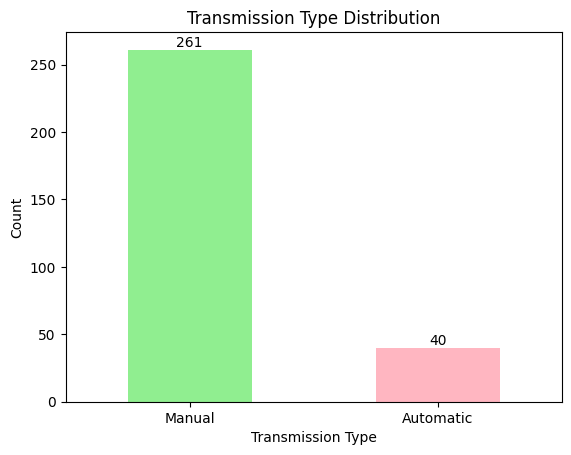

In [37]:
# Count occurrences of each transmission type
transmission_counts = data['Transmission'].value_counts().sort_index()
# Replace the numeric codes with meaningful names
transmission_counts.index = ['Manual', 'Automatic']
# Plotting for Transmission
x=transmission_counts.plot(kind='bar', color=['lightgreen', 'lightpink'])
plt.title('Transmission Type Distribution')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
x.bar_label(x.containers[0])
plt.show()

In [38]:
data.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0


In [39]:
X=data.drop(['Car_Name','Selling_Price'],axis=1)
y=data['Selling_Price']
#Splitting The Dataset Into The Training Set And Test Set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)
# Importing model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
#Preicting on test data
y_pred=lr.predict(X_test)
#Evaluating the algorithm
from sklearn import metrics
score = metrics.r2_score(y_test,y_pred)
print(score)

0.8839709260282632
